<a href="https://colab.research.google.com/github/jiehawes/wk/blob/master/AdaptiveFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://courses.engr.illinois.edu/ece420/sp2018/6_AdaptiveSignalProcessing.pdf
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib inline

In [3]:

N = 400 # Input size
K = 31 # Filter size

In [4]:
x = np.random.randn(N) # Input to the filter
h = signal.firwin(K, 0.5) # FIR system to be identified
t = signal.convolve(x, h) # Target output signal
t = t + 0.01 * np.random.randn(len(t)) # with added noise

In [5]:
mu = 0.05 # LMS step size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

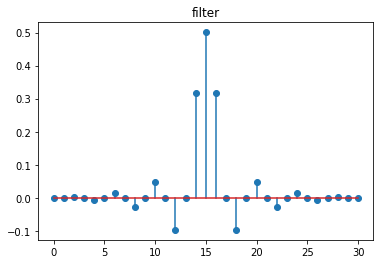

In [16]:
fig = plt.figure()
plt.title('filter')
plt.stem(h)

In [11]:
w = np.zeros(K) # Initial filter
e = np.zeros(N-K)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection inst

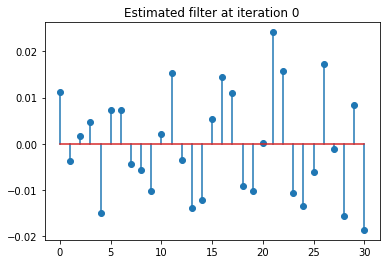

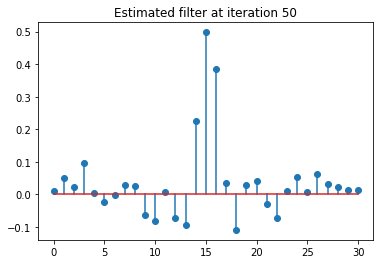

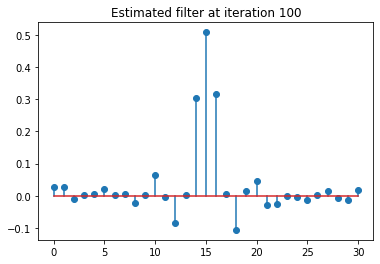

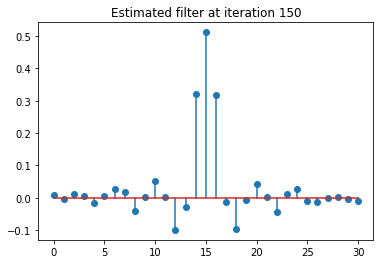

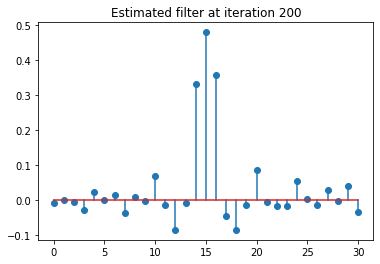

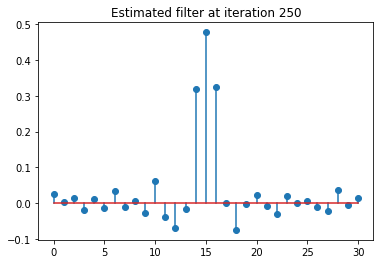

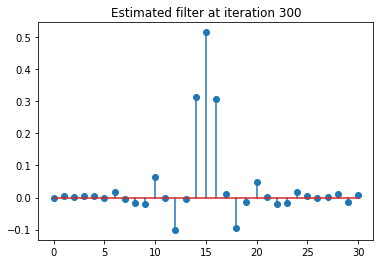

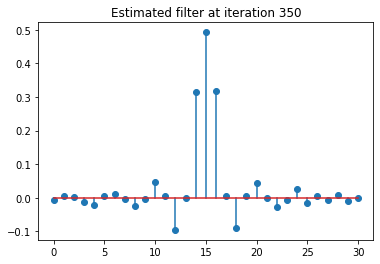

In [17]:
for n in range(0, N-K):
  xn = x[n+K:n:-1]
  en = t[n+K] - np.dot(xn , w) # Error
  w = w + mu * en * xn # Update filter (LMS algorithm)
  e[n] = en # Record error
  # Plot updated filter after each iteration
  if (n % 50 == 0):
    plt.figure()
    plt.title('Estimated filter at iteration %d' % n)
    plt.stem(w)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

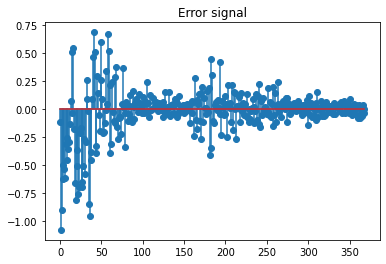

In [18]:
plt.figure()
plt.title('Error signal')
plt.stem(e)